In [1]:
data_path = "../data/dataset_nov_21.sqlite3"
image_path = "../public/images"

In [2]:
import os
import numpy as np
import matplotlib
import seaborn as sns
import pandas as pd

from matplotlib import pyplot as plt

import sqlite3
from sqlite3 import Error

In [3]:
# Plot params.

plt.rc('font', family='Lato', weight='bold')
plt.rc('pdf', fonttype=42)
plt.rc('ps', fonttype=42)

sns.set_context('notebook', font_scale=1)

In [4]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)

In [ ]:
def determine_significance(val):
    if val == 1.0:
        return 'Significant'
    if val == -1.0

In [48]:
conn = create_connection(data_path)

cols = [
    'change_annual_streamflow_mm',
    'change_low_flow',
    'change_peak_flow',
    'change_groundwater_recharge',
    'treatment_class',
    'fraction_treated',
    'catchment_name',
    'site_name',
    'sig_change_annual_streamflow',
    'sig_change_low_flow',
    'sig_change_peak_flow',
    'sig_change_groundwater_rechrg',
]

with conn:
    cur = conn.cursor()
    cur.execute("SELECT * FROM experimentalCatchments")
    rows = cur.fetchall()
    df = pd.DataFrame(rows,
                      columns=[
                          col_desc[0] for col_desc in cur.description
                      ])
    df=df.loc[:, cols]

df = df.rename(columns={
    'change_annual_streamflow_mm': 'change_annual_streamflow',
    'change_change_groundwater_rechrg': 'change_change_groundwater_recharge'
})

# Change +1 and -1 into + and –
for sig_col in [col for col in df.columns if col.startswith('sig_')]:
    df[sig_col] = df[sig_col].apply(lambda val: 'Significant' if val == 0 else 'Not significant')

df.head(4)

,change_annual_streamflow,change_low_flow,change_peak_flow,change_groundwater_recharge,treatment_class,fraction_treated,catchment_name,site_name,sig_change_annual_streamflow,sig_change_low_flow,sig_change_peak_flow,sig_change_groundwater_rechrg
0,-14.0,-3.4,0.4,None,Deforestation,0.25,FC-1,"Fox Creek, Oregon, USA",Significant,Significant,Significant,Significant
1,-6.0,-1.2,0.7,None,Deforestation,0.25,FC-3,"Fox Creek, Oregon, USA",Significant,Significant,Significant,Significant
2,102.0,NaN,NaN,None,Deforestation,0.52,XF1,"Upper Bear Creek, Alabama, USA",Significant,Significant,Significant,Significant
3,297.0,NaN,NaN,None,Deforestation,0.82,XF2,"Upper Bear Creek, Alabama, USA",Significant,Significant,Significant,Significant


In [49]:
effects = [
    'change_annual_streamflow',
    'change_low_flow',
    'change_peak_flow',
#     'change_groundwater_recharge'
]

effect_labels = [
    'Annual flow change',
    'Low flow change',
    'Peak flow change',
#     'Groundwater recharge'
]

treatments = [
    'Deforestation',
    'Afforestation'
]

## For each effect, plot all treatments

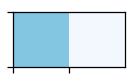

In [96]:
sig_palette = [
    sns.color_palette('muted')[-1], # blue
    (0.91, 0.95, 1, 0.5)  # light
]

sns.palplot(sig_palette)

In [108]:
def plot_single_effect_all_treatments(effect, effect_label,
                                      query=None, palette=None,
                                      hue='site_name'):
    if query:
        data = df.query(query)
    else:
        data = df
        
    fig, ax = plt.subplots()
    
    hues = list(reversed(sorted(data[hue].unique())))
    if len(hues) == 2:
        palette = sig_palette
    
    sns.despine(ax=ax)
    g = sns.swarmplot(
        data=data,
        y=effect,
        x='treatment_class',
        hue=hue,
        size=14,
        palette=palette,
        hue_order=hues,
        ax=ax,
    )
    plt.hlines(0, -1, len(df['treatment_class'].unique()))
    ax.set_xlabel('')
    ax.set_ylabel(effect_label, fontdict={'weight': 'regular'})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    handles, legend_labels = ax.get_legend_handles_labels()
    legend = ax.get_legend()
    legend.remove()
    
    legend_fig, legend_ax = plt.subplots()
    legend_fig.legend(handles, legend_labels, loc='center', frameon=False)
    legend_ax.set_axis_off()
    
    fig.set_figwidth(6)
    fig.set_tight_layout(tight=True)
    
    return fig, legend_fig

# plot_single_effect_all_treatments(effect, effect_label, hue='sign_change_peak_flow')

This will plot both the plots and separately their legends

/usr/lib/python3/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


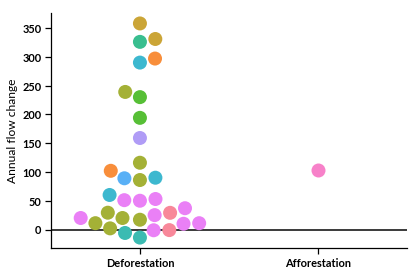

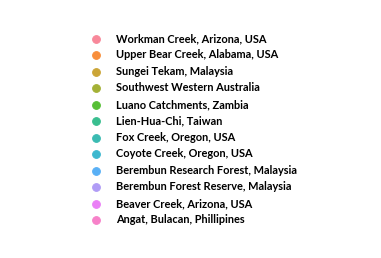

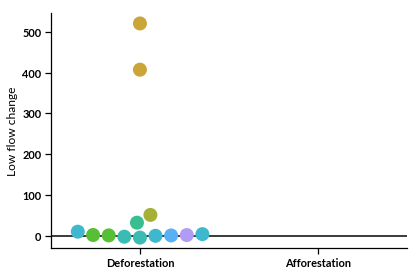

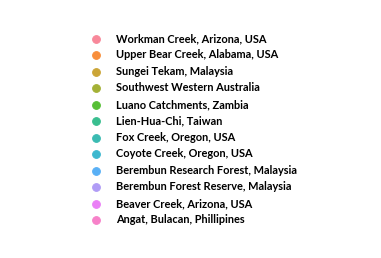

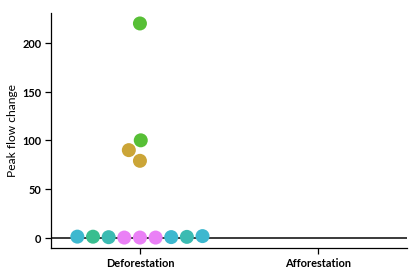

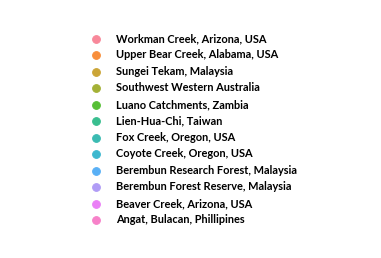

In [109]:
for effect, effect_label in zip(effects, effect_labels):
    fig, legend = plot_single_effect_all_treatments(effect, effect_label)
    fig.savefig('%s/%s_sites.svg' % (image_path, effect))

legend.savefig('%s/sites_legend.svg' % image_path)

/usr/lib/python3/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


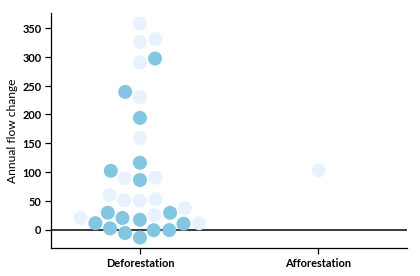

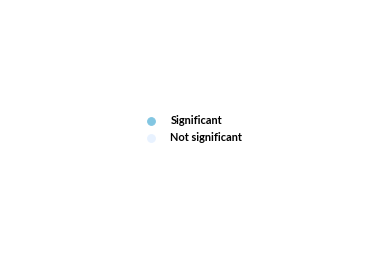

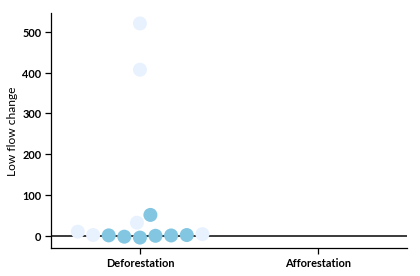

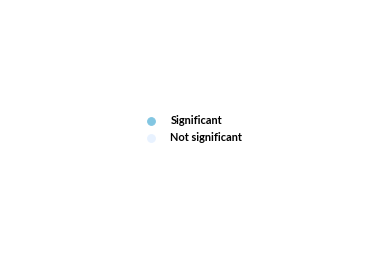

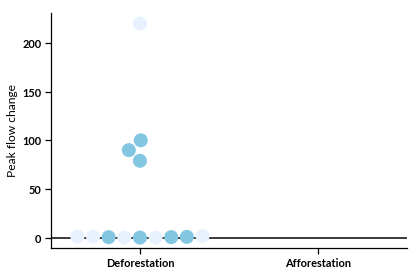

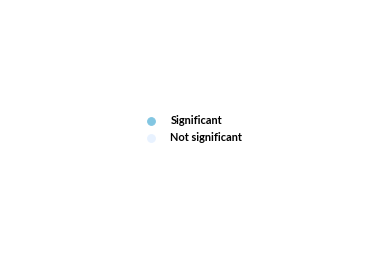

In [110]:
for effect, effect_label in zip(effects, effect_labels):
    fig, legend = plot_single_effect_all_treatments(effect, effect_label, hue='sig_' + effect)
    fig.savefig('%s/%s_sigs.svg' % (image_path, effect))

legend.savefig('%s/sigs_legend.svg' % image_path)

## For each treatment, plot all effects

In [10]:
melt_df = df.melt(id_vars='treatment_class', value_vars=effects)
melt_df.head()

,treatment_class,variable,value
0,Deforestation,change_annual_streamflow,-14.0
1,Deforestation,change_annual_streamflow,-6.0
2,Deforestation,change_annual_streamflow,102.0
3,Deforestation,change_annual_streamflow,297.0
4,Deforestation,change_annual_streamflow,-1.3


In [121]:
def plot_all_effects_single_treatment(treatment,
                                      query=None, palette=None,
                                      hue='site_name'):
    if query:
        data = df.query(query)
    else:
        data = df
    
    grid = sns.FacetGrid(melt_df, col='variable')

    for (effect, effect_label, ax) in zip(effects, effect_labels, grid.axes[0]):
        data_treatment = df.query('treatment_class=="%s"' % treatment)
        if hue == 'sig_':
            hue = 'sig_' + effect
            
        hues = list(reversed(sorted(data[hue].unique())))
        if len(hues) == 2:
            palette = sig_palette
        
        sns.swarmplot(data=data_treatment,
                      x='treatment_class', y=effect,
                      hue=hue,
                      hue_order=hues,
                      size=14,
                      palette=palette,
                      ax=ax)
        ax.set_xlabel('')
        ax.set_xticklabels([''])
        ax.set_ylabel(effect_label, fontdict={'weight': 'regular'})
        ax.hlines(0, -1, 1)
        ax.get_legend().remove()

    grid.fig.set_figwidth(10)
    grid.fig.set_figheight(5)
    grid.fig.set_tight_layout(tight=True)

    return grid

# plot_all_effects_single_treatment('Deforestation', hue='sign_')

/usr/lib/python3/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


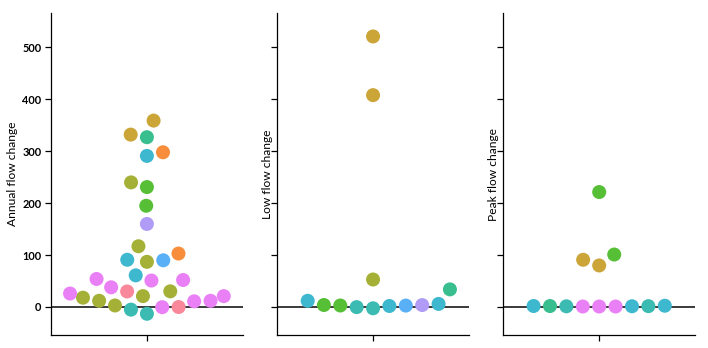

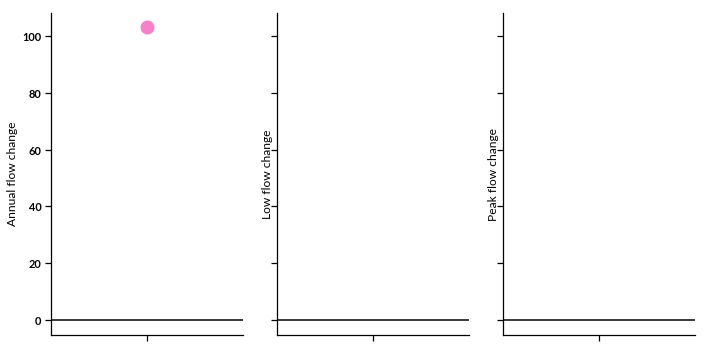

In [122]:
for treatment in treatments:
    grid = plot_all_effects_single_treatment(treatment, hue='site_name')
    grid.fig.savefig('%s/%s_sites.svg' % (image_path, treatment))

/usr/lib/python3/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


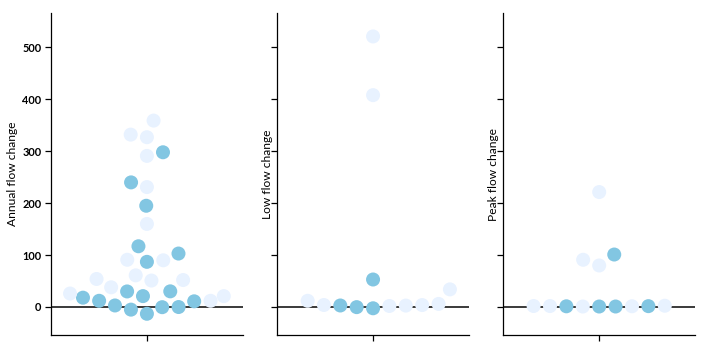

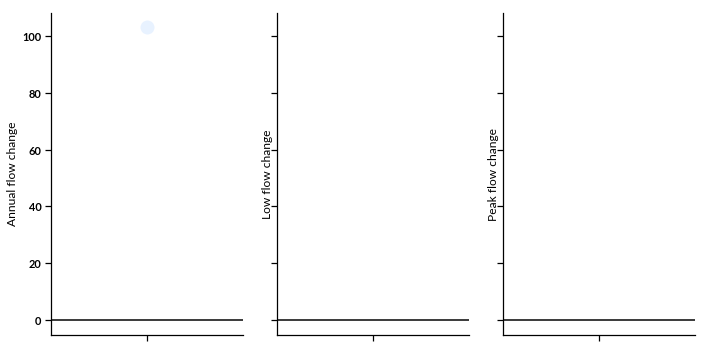

In [123]:
for treatment in treatments:
    grid = plot_all_effects_single_treatment(treatment, hue='sig_')
    grid.fig.savefig('%s/%s_sig.svg' % (image_path, treatment))

## Full grid (treatments x effects)

/usr/lib/python3/dist-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


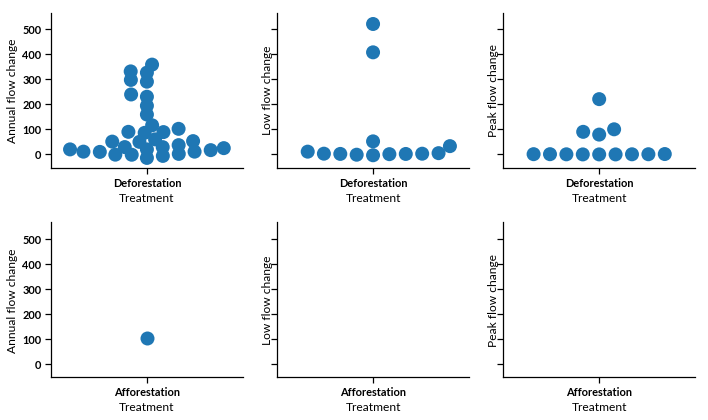

In [34]:
grid = sns.FacetGrid(melt_df, col='variable', row='treatment_class',
                     sharex=False)

for i, treatment in enumerate(treatments):
    for (effect, effect_label, ax) in zip(effects, effect_labels, grid.axes[i]):
        sns.swarmplot(data=df.query('treatment_class=="%s"' % treatment),
                      x='treatment_class', y=effect,
                      size=14,
                      ax=ax)
        
        ax.set_xlabel('Treatment', fontdict={'weight': 'regular'})
        ax.set_ylabel(effect_label, fontdict={'weight': 'regular'})

grid.fig.set_figwidth(10)
grid.fig.set_tight_layout(tight=True)